# Boston House Prices dataset

```
:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None

:Creator: Harrison, D. and Rubinfeld, D.L.
```

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


np.random.seed(0)
sns.set(rc={'figure.figsize': (15, 15,)})
plt.style.use('seaborn-white')

dataset = load_boston()
df = pd.DataFrame(data=np.c_[dataset.data, dataset.target], columns=list(dataset.feature_names) + ['MEDV'])
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

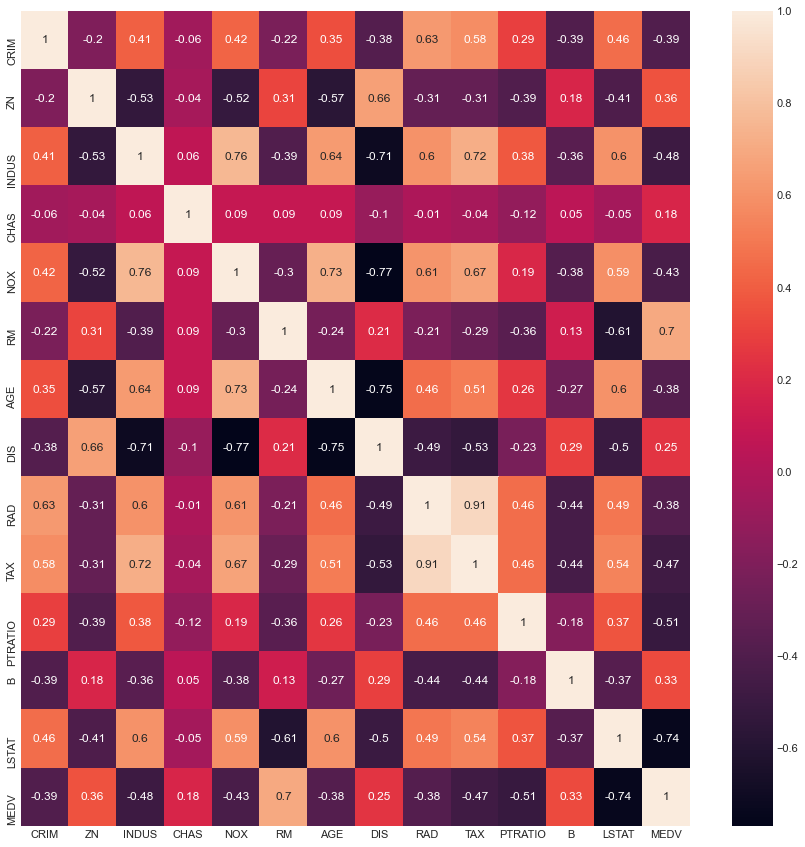

In [18]:
sns.heatmap(df.corr().round(2), annot=True);

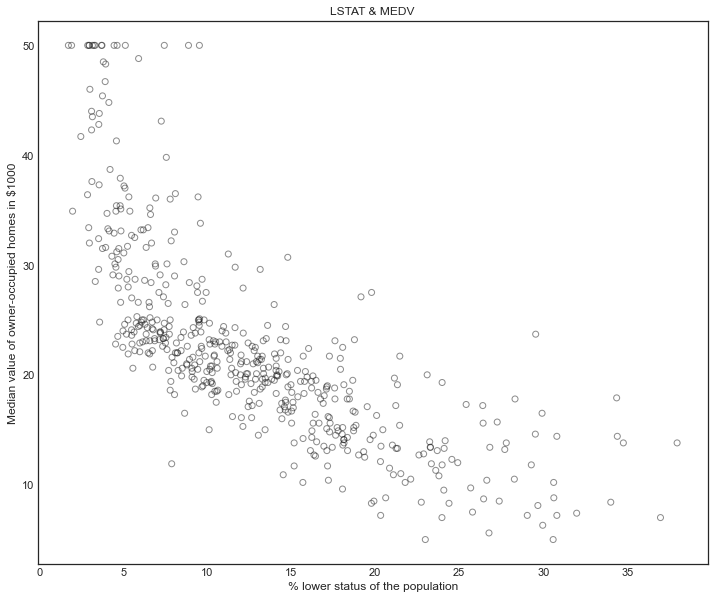

In [19]:
plt.figure(figsize=(12, 10))
plt.title('LSTAT & MEDV')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.scatter(df['LSTAT'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5);

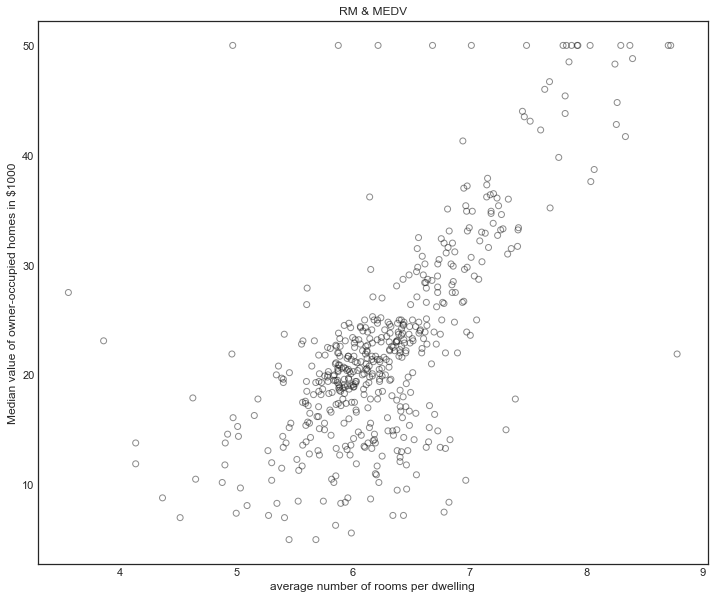

In [20]:
plt.figure(figsize=(12, 10))
plt.title('RM & MEDV')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.scatter(df['RM'], df['MEDV'], facecolors='None', edgecolors='k', alpha=.5);

In [21]:
X = np.array(df['RM'])
Y = np.array(df['MEDV'])
X.shape, Y.shape

((506,), (506,))


## Least Squares method

In [28]:
coeffs = np.random.random(X.shape)
rss = (Y - X.T * coeffs)**2  # or (Y - X*coeffs)*(Y - X*coeffs)
print(rss[:10])

[517.23702392 314.05308846 896.53596689 860.49477693 899.09774703
 497.84339145 335.17051006 587.06641731 139.3371044  330.41038482]


In [23]:
rss

array([4.15815361e+02, 2.89264209e+02, 9.22284977e+02, 8.75385095e+02,
       1.10039082e+03, 6.02550341e+02, 4.10841510e+02, 4.66386224e+02,
       1.22624949e+02, 2.75487533e+02, 9.90257731e+01, 2.47177210e+02,
       3.36898154e+02, 2.21820083e+02, 3.15665017e+02, 3.76037551e+02,
       5.28080575e+02, 1.56565337e+02, 2.54542138e+02, 1.74700731e+02,
       6.64077629e+01, 2.20018458e+02, 1.52907909e+02, 9.92570630e+01,
       2.21990401e+02, 1.06442185e+02, 2.48588430e+02, 8.25842385e+01,
       2.25317967e+02, 3.32425741e+02, 1.25184631e+02, 9.60175209e+01,
       1.09954215e+02, 9.72069413e+01, 1.79170469e+02, 2.32122550e+02,
       2.69772376e+02, 3.02444659e+02, 3.63649605e+02, 6.91868595e+02,
       1.04812874e+03, 5.58910767e+02, 4.40845166e+02, 5.91751337e+02,
       2.94238885e+02, 2.39922616e+02, 3.52790815e+02, 2.50353861e+02,
       1.61213868e+02, 3.01456138e+02, 2.65687283e+02, 3.17479404e+02,
       3.44648010e+02, 5.19289992e+02, 3.12233624e+02, 1.17173858e+03,
      